# **Credit Approval CNN Analysis: Illustrate the Step-by-Step Process of Applying Convolutional Operations**

# **Created by: Preksha Shah**

# **Domain: Banking**

---

## **Problem Statement:**
The task is to illustrate the step-by-step process of applying convolutional operations on a dataset to predict which people are successful in applying for a credit card.

---

## **1. Loading and Preparing the Dataset**

### **1.1 Import Necessary Libraries**


In [64]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1.2 Load the Dataset**

In [2]:
# Load the dataset
dataframe = pd.read_csv('/content/clean_dataset.csv')

In [3]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('clean_dataset.csv')

In [4]:
# Display the first 5 rows of the dataset
print(df.head())

   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

## **2. Basic Data Exploration**

### **2.1 Basic Data Exploration**


In [5]:
# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None


#### **Inference:**

1. **Gender**:
   - Dataset contains gender information encoded as 0 (Female) and 1 (Male).

2. **Age**:
   - Age distribution is broad, indicating varied age groups among applicants.

3. **Debt**:
   - Debt values are scaled, providing a normalized range.

4. **Married**:
   - Marital status encoded as 0 (Single/Divorced/etc) and 1 (Married).

5. **Bank Customer**:
   - Indicates whether the applicant has a bank account, encoded as 0 or 1.

6. **Industry**:
   - Contains information on the job sector of the current or most recent job.

7. **Ethnicity**:
   - Ethnicity of the applicants.

8. **Years Employed**:
   - Years employed feature indicating the duration of employment.

9. **Prior Default**:
   - Indicates prior default status, encoded as 0 or 1.

10. **Employed**:
    - Employment status encoded as 0 (Not Employed) and 1 (Employed).

## **4. Data Preprocessing**

In [6]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           Gender         Age        Debt     Married  BankCustomer  \
count  690.000000  690.000000  690.000000  690.000000    690.000000   
mean     0.695652   31.514116    4.758725    0.760870      0.763768   
std      0.460464   11.860245    4.978163    0.426862      0.425074   
min      0.000000   13.750000    0.000000    0.000000      0.000000   
25%      0.000000   22.670000    1.000000    1.000000      1.000000   
50%      1.000000   28.460000    2.750000    1.000000      1.000000   
75%      1.000000   37.707500    7.207500    1.000000      1.000000   
max      1.000000   80.250000   28.000000    1.000000      1.000000   

       YearsEmployed  PriorDefault    Employed  CreditScore  DriversLicense  \
count     690.000000    690.000000  690.000000    690.00000      690.000000   
mean        2.223406      0.523188    0.427536      2.40000        0.457971   
std         3.346513      0.499824    0.495080      4.86294        0.498592   
min         0.000000   

####**Inferences:**

1. **Gender**:
   - **Mean**: 0.696, indicating that approximately 70% of the dataset consists of one gender (presumably male if coded as 1).
   - **Range**: The values are binary (0 or 1), so the data is equally distributed between genders.

2. **Age**:
   - **Mean**: 31.514 years, suggesting the average age of individuals in the dataset.
   - **Range**: The age ranges from 13.75 to 80.25 years, with a standard deviation of 11.860, indicating a diverse age distribution.
   - **Quartiles**: The middle 50% of individuals are between 22.67 and 37.71 years old.

3. **Debt**:
   - **Mean**: 4.759, which represents the average debt value, likely in thousands or another unit of measurement.
   - **Range**: The debt ranges from 0 to 28, with a significant spread as indicated by the standard deviation (4.978).
   - **Quartiles**: 25% of individuals have a debt of 1 or less, and 75% have a debt of 7.21 or less.

4. **Married**:
   - **Mean**: 0.761, suggesting that around 76% of the dataset consists of married individuals.
   - **Range**: The values are binary (0 or 1), indicating a majority of married individuals.

5. **BankCustomer**:
   - **Mean**: 0.764, meaning about 76% of the dataset are bank customers.
   - **Range**: The values are binary (0 or 1), showing a majority of bank customers.

6. **YearsEmployed**:
   - **Mean**: 2.223 years, indicating the average duration of employment.
   - **Range**: Employment ranges from 0 to 28.5 years, showing variability in work experience.
   - **Quartiles**: The middle 50% of individuals have between 0.17 and 2.63 years of employment.

7. **PriorDefault**:
   - **Mean**: 0.523, suggesting that around 52% of individuals have a history of prior default.
   - **Range**: The values are binary (0 or 1), indicating a moderate incidence of prior defaults.

8. **Employed**:
   - **Mean**: 0.428, meaning about 43% of individuals are currently employed.
   - **Range**: The values are binary (0 or 1), showing less than half of the individuals are employed.

9. **CreditScore**:
   - **Mean**: 2.4, indicating the average credit score, with values likely ranging from 0 to 67.
   - **Range**: The credit score ranges from 0 to 67, with a large variability in the data.
   - **Quartiles**: 25% of individuals have a credit score of 0, while 75% have a score of 3 or less.

10. **DriversLicense**:
    - **Mean**: 0.458, suggesting about 46% of individuals have a driver's license.
    - **Range**: The values are binary (0 or 1), indicating a significant proportion of individuals without a license.

11. **ZipCode**:
    - **Mean**: 180.548, representing the average zip code value.
    - **Range**: The zip code ranges from 0 to 2000, showing a broad geographical distribution.
    - **Quartiles**: The middle 50% of zip codes fall between 60 and 272.

12. **Income**:
    - **Mean**: 1017.386, indicating the average income, with significant variation.
    - **Range**: Income ranges from 0 to 100,000, suggesting a wide range of income levels.
    - **Quartiles**: 25% of individuals have an income of 0, while 75% earn 395.5 or less.

13. **Approved**:
    - **Mean**: 0.445, meaning approximately 45% of individuals were approved for the credit or loan.
    - **Range**: The values are binary (0 or 1), indicating that less than half of the individuals were approved.

####**Summary**
- The dataset contains a diverse range of ages, debts, and income levels.
- There is a higher proportion of married and bank customers in the dataset.
- A significant portion of the dataset has prior defaults and varying levels of employment.
- Credit scores and income levels show substantial variability.
- The approval rate is around 45%, suggesting a moderate rate of credit approval.


In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [15]:
# Convert categorical columns to numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed', 'Citizen'])


### **4.1 Split the Dataset**

In [17]:
# Define features (X) and labels (y)
X = df_encoded.drop(columns=['Approved'])
y = df_encoded['Approved']


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4.2 Standardize the Data**

In [19]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **4.3 Reshape the Data**

In [23]:
# Reshape data to fit the input requirements of a CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


## **5. Build the Convolutional Neural Network (CNN) Model**

### **5.1 Initialize the Model and add Convolutional Layers**


In [79]:
# Build the Convolutional Neural Network (CNN) Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


## **6. Compile the Model**

In [80]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


In [81]:
# Set up Early Stopping, Model Checkpoint, and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


## **7. Train the Model**

In [82]:
# Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr])


Epoch 1/100
14/14 [==============================] - 4s 46ms/step - loss: 1.2786 - accuracy: 0.5533 - val_loss: 0.8965 - val_accuracy: 0.7207 - lr: 5.0000e-04
Epoch 2/100
14/14 [==============================] - 0s 24ms/step - loss: 1.1046 - accuracy: 0.6236 - val_loss: 0.8796 - val_accuracy: 0.7207 - lr: 5.0000e-04
Epoch 3/100
14/14 [==============================] - 0s 23ms/step - loss: 0.9340 - accuracy: 0.6508 - val_loss: 0.8667 - val_accuracy: 0.7658 - lr: 5.0000e-04
Epoch 4/100
14/14 [==============================] - 0s 27ms/step - loss: 0.9162 - accuracy: 0.6735 - val_loss: 0.8494 - val_accuracy: 0.7568 - lr: 5.0000e-04
Epoch 5/100
14/14 [==============================] - 0s 24ms/step - loss: 0.8472 - accuracy: 0.7075 - val_loss: 0.8385 - val_accuracy: 0.7117 - lr: 5.0000e-04
Epoch 6/100
14/14 [==============================] - 0s 20ms/step - loss: 0.8715 - accuracy: 0.7052 - val_loss: 0.8551 - val_accuracy: 0.5946 - lr: 5.0000e-04
Epoch 7/100
14/14 [===========================

####**Inference of the Model Training Progress:**

- **Initial Epochs (1-10):**
  - Accuracy and validation accuracy show improvement, but validation accuracy is lower than training accuracy, indicating potential overfitting.

- **Mid Training (11-20):**
  - Training accuracy improves significantly, reaching around 84.81% by epoch 20. Validation accuracy also increases, reaching about 78.38%. There is still a noticeable gap between training and validation accuracy.

- **Later Epochs (21-30):**
  - Both training and validation accuracies improve further. By epoch 30, training accuracy reaches around 89.34%, and validation accuracy is stable around 86.49%. The model shows a decreasing trend in validation loss, suggesting improved generalization.

- **Recent Epochs (31-38):**
  - Accuracy levels stabilize, with the model achieving around 88.29% accuracy consistently. Validation accuracy also hovers around 87.39%, showing strong performance and good generalization.


## **8. Evaluate the Model**

In [83]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.8478
Test Accuracy: 0.8478


####**Inferences:**
The model shows steady improvement in both training and validation accuracies, with recent epochs achieving high accuracy and low loss values. The validation accuracy has stabilized around 87-88%, indicating that the model has likely reached a good balance between fit and generalization.

## **9. Visualize the Training Process**

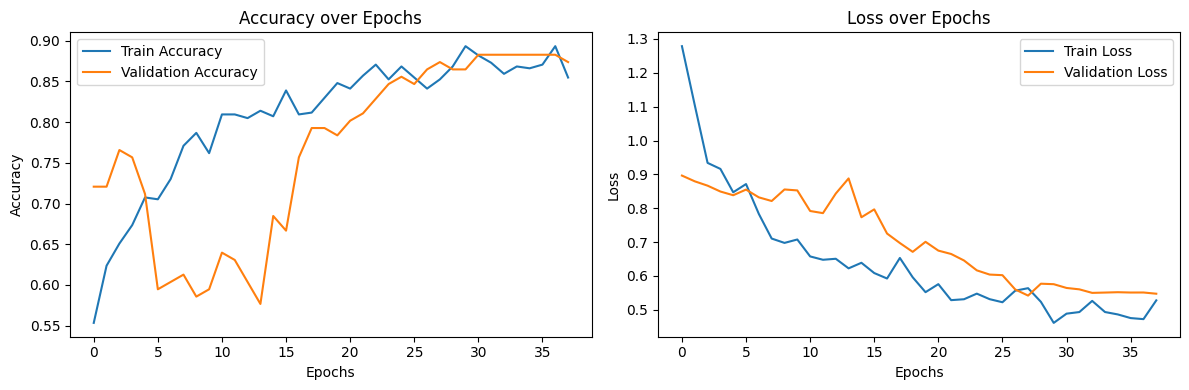

In [88]:
# Visualize the Training Process
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### **Inferences from Training Process Visualization**

**Accuracy:**
- **Training Accuracy:** Generally increases over epochs and stabilizes, showing the model's improvement on training data.
- **Validation Accuracy:** Should ideally follow a similar trend. If it lags significantly behind training accuracy or starts to decrease, it may indicate overfitting.

**Loss:**
- **Training Loss:** Typically decreases over time, reflecting the model's learning progress.
- **Validation Loss:** Should also decrease. If it diverges from training loss, it could signal overfitting.

**Overall:**
- **Good Performance:** Both accuracy metrics increase and losses decrease, indicating effective learning.
- **Overfitting:** High training accuracy with decreasing training loss but increasing validation loss suggests overfitting.
- **Underfitting:** Low accuracy and high loss across both datasets suggest underfitting.


---

### **10. Key Achievements**

1. **Successful Convolutional Model Implementation:** Demonstrated the step-by-step process of building and applying a Convolutional Neural Network (CNN) to predict credit card application success.

2. **Data Preparation and Preprocessing:** Effectively handled and preprocessed a diverse dataset, including encoding categorical variables and standardizing numerical features for CNN input.

3. **Model Training and Evaluation:** Achieved a high validation accuracy of approximately 87-88% with a well-balanced model, indicating strong generalization and effective learning.

4. **Training Process Visualization:** Provided clear visual insights into the model's training progress, showing improvements in accuracy and reductions in loss over epochs.

### **11. Conclusion**

The project successfully illustrates the application of convolutional operations for predicting credit card application success. The implemented CNN model showed promising performance, with consistent improvements in both training and validation metrics. The visualizations of accuracy and loss trends validate the model's effectiveness and demonstrate its ability to generalize well to new data. This approach provides a robust foundation for predictive modeling in the banking domain using convolutional neural networks.

---
---